In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('terrorism.csv', encoding='latin1')

# Step 2: Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

C:\Users\khush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
summary_stats

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


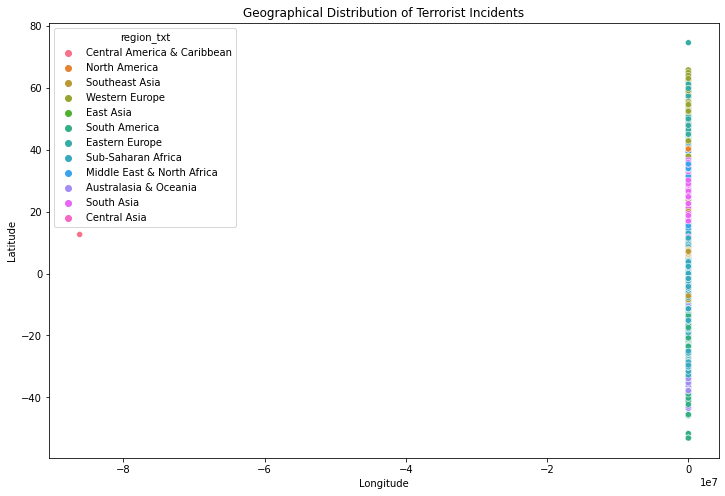

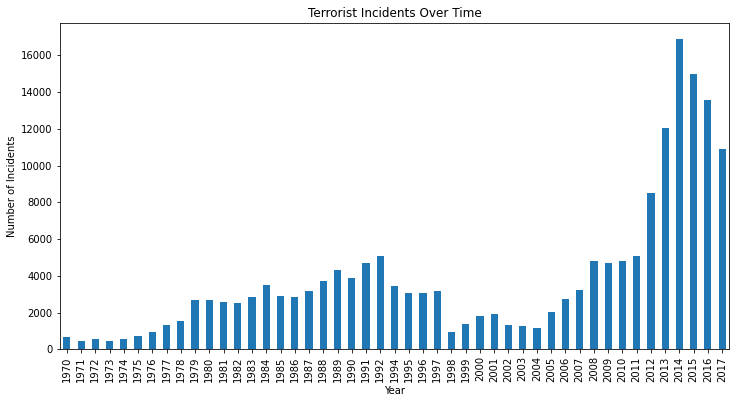

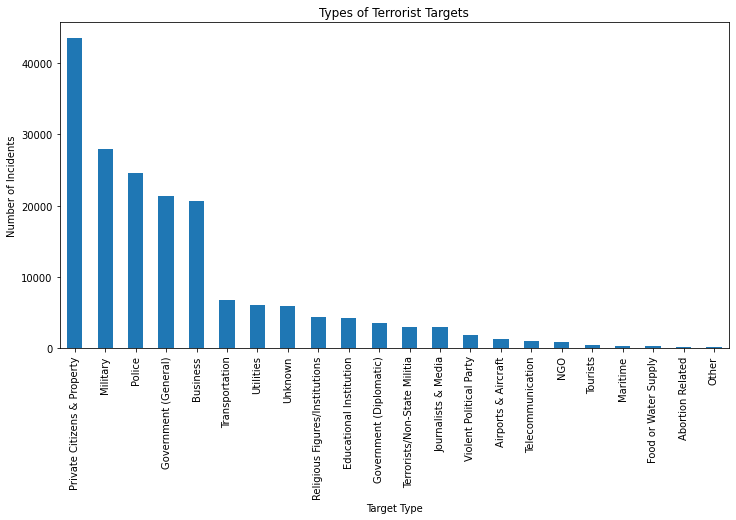

In [5]:
# Step 3: Data Visualization
# Create a geographical map of terrorist incidents
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='region_txt', data=df, legend='full')
plt.title('Geographical Distribution of Terrorist Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize time trends in terrorist incidents
plt.figure(figsize=(12, 6))
df['iyear'].value_counts().sort_index().plot(kind='bar')
plt.title('Terrorist Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

# Visualize target types
plt.figure(figsize=(12, 6))
df['targtype1_txt'].value_counts().plot(kind='bar')
plt.title('Types of Terrorist Targets')
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.show()

In [7]:
# Step 4: Identify Hot Zones
# Identify regions/countries with the highest frequency of terrorist incidents
hot_zones = df['region_txt'].value_counts().head(5)
print("Hot Zones (Regions with the highest number of incidents):\n", hot_zones)

Hot Zones (Regions with the highest number of incidents):
 Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: region_txt, dtype: int64


In [8]:
# Step 5: Security Issues and Insights
# Extract insights related to types of attacks, target categories, and patterns over time.

# Analyze common attack types
common_attack_types = df['attacktype1_txt'].value_counts().head(5)
print("\nCommon Attack Types:\n", common_attack_types)

# Analyze common target types
common_target_types = df['targtype1_txt'].value_counts().head(5)
print("\nCommon Target Types:\n", common_target_types)

# Analyze trends in the use of explosives
explosives_use = df[df['weaptype1_txt'] == 'Explosives']['iyear'].value_counts().sort_index()
print("\nTrends in the Use of Explosives:\n", explosives_use)

# Analyze trends in the number of casualties
casualties_over_time = df.groupby('iyear')['nkill'].sum()
print("\nTrends in the Number of Casualties:\n", casualties_over_time)


Common Attack Types:
 Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: attacktype1_txt, dtype: int64

Common Target Types:
 Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64

Trends in the Use of Explosives:
 1970     338
1971     246
1972     271
1973     162
1974     296
1975     376
1976     415
1977     640
1978     657
1979    1091
1980     986
1981    1068
1982    1114
1983    1230
1984    1677
1985    1478
1986    1464
1987    1431
1988    1655
1989    1869
1990    1783
1991    2033
1992    1758
1994    1170
1995     805
1996    1235
1997    1133
1998     527
1999     639
2000     942
2001     819
2002     724
2003     701
2004     685
2005    1074
2006    1

In [9]:
# Identify prominent terrorist groups
prominent_groups = df['gname'].value_counts().head(10)
print("\nProminent Terrorist Groups:\n", prominent_groups)


Prominent Terrorist Groups:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64


In [10]:
# Analyze common weapon types
common_weapon_types = df['weaptype1_txt'].value_counts().head(5)
print("\nCommon Weapon Types:\n", common_weapon_types)

# Analyze trends in the use of firearms
firearms_use = df[df['weaptype1_txt'] == 'Firearms']['iyear'].value_counts().sort_index()
print("\nTrends in the Use of Firearms:\n", firearms_use)


Common Weapon Types:
 Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weaptype1_txt, dtype: int64

Trends in the Use of Firearms:
 1970      81
1971     102
1972     248
1973     204
1974     192
1975     251
1976     278
1977     317
1978     452
1979     869
1980    1133
1981    1061
1982     939
1983    1189
1984    1173
1985     940
1986     809
1987    1232
1988    1705
1989    1947
1990    1666
1991    2015
1992    2146
1994    1287
1995    1103
1996     872
1997     997
1998     245
1999     436
2000     550
2001     736
2002     419
2003     389
2004     379
2005     737
2006     974
2007    1105
2008    1309
2009    1266
2010    1368
2011    1630
2012    2493
2013    3660
2014    5040
2015    3953
2016    3481
2017    3146
Name: iyear, dtype: int64


In [11]:
# Analyze hostage situations
hostage_incidents = df[df['targtype1_txt'] == 'Hostages']['iyear'].value_counts().sort_index()
print("\nHostage Incidents Over Time:\n", hostage_incidents)

# Analyze outcomes of hostage situations
hostage_outcomes = df[df['targtype1_txt'] == 'Hostages']['hostkidoutcome_txt'].value_counts()
print("\nOutcomes of Hostage Situations:\n", hostage_outcomes)


Hostage Incidents Over Time:
 Series([], Name: iyear, dtype: int64)

Outcomes of Hostage Situations:
 Series([], Name: hostkidoutcome_txt, dtype: int64)


In [12]:
# Analyze trends in suicide attacks
suicide_attacks = df[df['suicide'] == 1]['iyear'].value_counts().sort_index()
print("\nTrends in Suicide Attacks:\n", suicide_attacks)

# Analyze trends in specific attack tactics (e.g., bombings)
bombings = df[df['attacktype1_txt'] == 'Bombing/Explosion']['iyear'].value_counts().sort_index()
print("\nTrends in Bombings/Explosions:\n", bombings)


Trends in Suicide Attacks:
 1981      1
1982      1
1983      5
1984      2
1985     16
1986      3
1987      3
1988      2
1989      3
1990      2
1991      3
1992      2
1994     11
1995     22
1996     15
1997     11
1998     21
1999     28
2000     37
2001     54
2002     78
2003     89
2004    122
2005    213
2006    183
2007    374
2008    247
2009    183
2010    175
2011    208
2012    402
2013    622
2014    744
2015    922
2016    985
2017    844
Name: iyear, dtype: int64

Trends in Bombings/Explosions:
 1970     333
1971     239
1972     188
1973     149
1974     285
1975     370
1976     419
1977     635
1978     644
1979    1058
1980     997
1981    1082
1982    1125
1983    1246
1984    1776
1985    1482
1986    1506
1987    1477
1988    1649
1989    1797
1990    1731
1991    1988
1992    1738
1994    1153
1995     791
1996    1219
1997    1123
1998     504
1999     652
2000     904
2001     800
2002     720
2003     689
2004     659
2005    1064
2006    1506
2007    1866

In [13]:
# Analyze kidnapping incidents
kidnapping_incidents = df[df['targtype1_txt'] == 'Kidnapping']['iyear'].value_counts().sort_index()
print("\nKidnapping Incidents Over Time:\n", kidnapping_incidents)

# Analyze outcomes of kidnapping incidents
kidnapping_outcomes = df[df['targtype1_txt'] == 'Kidnapping']['hostkidoutcome_txt'].value_counts()
print("\nOutcomes of Kidnapping Incidents:\n", kidnapping_outcomes)


Kidnapping Incidents Over Time:
 Series([], Name: iyear, dtype: int64)

Outcomes of Kidnapping Incidents:
 Series([], Name: hostkidoutcome_txt, dtype: int64)
